# **UNIVERSIDAD DE LOS HEMISFERIOS**

### **CASO PRACTICO FINAL**

**NOMBRE:**

*Andres Gallegos Aguilar*



# **Contenido de la actividad**


## Enunciado

Trabajamos como científicos de datos para una empresa de retail que, debido al cambio en los hábitos de consumo de los clientes, está potenciando ampliamente el servicio de venta online. La empresa quiere realizar un modelo de aprendizaje automático para clasificar a los clientes en función de la probabilidad de generar ingresos al comprar en la web. El objetivo es realizar una serie de acciones específicas para los clientes que es más probable que hagan compras en la web. Para ello, la empresa ha ido recopilando datos con su herramienta de Google Analytics. Cuenta con datos de sesiones, cada una de ellas de un cliente distinto en un periodo de un año.

## Instrucciones

Tareas que nos pide la empresa:

* Realización de un análisis de las variables del dataset de Google
Analytics como pueden ser histogramas, boxplots, etc. Cualquier otro
análisis es bienvenido, siempre explicándolo y con un sentido de negocio.

* Tratamiento de los valores faltantes, outliers, etc., en caso de que los hubiese. Si hay valores con missings, habrá que eliminarlos con el método de Pandas llamado Dropna().a.

* Tratamiento de categóricas, pasándolas a numéricas por medio de dummies, mapeándolas o utilizando un label encoder. Hay que justificar las operaciones que se realizan.

* Si existe alguna variable que se necesite borrar, habrá que borrara y
justificarlo.

* Estandariza los datos.

* Dividir los datos en train y en test. Con los datos de train se pretende ajustar modelos con CrossValidation y GridSearch.

* Utilizar un modelo lineal. Entre los modelos lineales están las regresiones logísticas, las regresiones lineales, etc.

* Utilizar un modelo de redes neuronales.

* Utilizar cualquier otro modelo de clasificación.

* Optimizar algún parámetro de cada modelo utilizando CrossValidation y GridSearch, o de la forma que se estime oportuna, siempre justificándolo.

* Elegir el mejor modelo de los tres según la métrica ROC en CrossValidation. Predecir Test y obtener una métrica estimada.

* Umbralizar las probabilidades utilizando el umbral que maximice el área bajo la curva ROC.

* El entregable final será un Jupyter Notebook en el que se realicen todos
los análisis y los modelos.


## Consideraciones

3Lo que se pide es un modelo end-to-end como los vistos en prácticas en el módulo. En este caso, hay que aplicar tres modelos y escoger el mejor, pero la
parte previa es común a los tres.

Se tendrán en cuenta la estructura del código, las interpretaciones y las
justificaciones.

El esquema que se pone en las tareas es un esquema general. Si se necesita
hacer alguna tarea, se puede llevar a cabo. También es posible aplicar cualquier otro algoritmo visto en el módulo, siempre justificando y haciendo las
cosas con un sentido.

**Información de los datos:**

El conjunto de datos consta de diez atributos numéricos y ocho categóricos.

* El atributo **revenue** puede ser usado como la etiqueta de la clase.

* **Administrative, administrative duration, informational,
informational duration, product related y product related duration** representan el número de diferentes tipos de páginas visitadas por el visitante en esa sesión y el tiempo total dedicado a cada una de estas categorías de páginas. Los valores de estas características se derivan de la información del URL de las páginas visitadas por el usuario y se actualizan en tiempo real cuando el usuario realiza una acción, por ejemplo, pasar de una página a otra.

* Las características **bounce rate**, exit rate y page value representan las
métricas medidas por Google Analytics para cada página del sitio de
comercio electrónico. El valor de la característica bounce rate de una
página web se refiere al porcentaje de visitantes que entran en el sitio
desde esa página y luego salen (rebote) sin activar ninguna otra solicitud
al servidor de análisis durante esa sesión. El valor de la característica **exit rate** para una página web específica se calcula como para todas las
visitas a la página, el porcentaje que fueron las últimas en la sesión. La
función **Page Value** representa el valor medio de una página web que un usuario ha visitado antes de completar una transacción de comercio electrónico.

* La característica de **special day** indica la cercanía de la hora de visita
del sitio a un día especial específico (por ejemplo, el Día de la Madre, San
Valentín) en el que es más probable que las sesiones finalicen con una
transacción. El valor de este atributo se determina teniendo en cuenta la
dinámica del comercio electrónico, como la duración entre la fecha del
pedido y la fecha de entrega. Por ejemplo, para San Valentín, este valor
toma un valor distinto de 0 entre el 2 y el 12 de febrero, 0 antes y
después de esta fecha a menos que esté cerca de otro día especial, y su
valor máximo de 1 el 8 de febrero.

* El conjunto de datos también incluye el sistema operativo, el navegador,
la región, el tipo de tráfico, el tipo de visitante como visitante que
regresa o como nuevo visitante, un valor booleano que indica si la fecha
de la visita es de fin de semana, y el mes del año.
Los datos se han obtenido de la siguiente web, aunque se pueden descargar de
la plataforma de IMF Business School:

https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

# Desarrollo

## Importación de librerias

In [ ]:
# Análisis exploratorio de datos:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
sns.set()
from sklearn.preprocessing import LabelEncoder
style.use("ggplot")
import missingno
from scipy import stats
from scipy.stats import shapiro, norm, skew, boxcox
from scipy.special import boxcox1p
import re
from collections import OrderedDict
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


## Funciones

In [ ]:
def doble_hist(x_1, x_0, n_bins=11, title='', label_1='Clase 1',
                          label_0='Clase 0', density=0):
    '''
    Función que recibe dos distribuciones de probabilidad y las representa
    en el mismo gráfico
    '''
    bins = n_bins
    plt.hist(x_1, bins, density = density, alpha=0.5, label=label_1, color='red')
    plt.hist(x_0, bins, density = density, alpha=0.5, label=label_0, color='green')
    plt.title(title)
    plt.legend(loc='best')

## Carga de los datos

En primer lugar importamos el dataset **online_shoppers_intention** y lo almacenamos en un dataframe de Pandas.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Leer el data set
df_online_shoppers_intention=pd.read_csv('/content/drive/MyDrive/MASTER/online_shoppers_intention.csv')

## Descripcón de los datos

In [ ]:
# Comprobar el tamaño del df online_shoppers_intention
dimData = df_online_shoppers_intention.shape
print(f"Los datos cuentan con {dimData[0]} registros y {dimData[1]} Columnas")

Los datos cuentan con 12330 registros y 18 Columnas


El dataset de online_shoppers_intention está compuesto por 18 columnas y 12330 entradas. Vamos a visualizar el nombre de sus colmunas.

In [ ]:
print(df_online_shoppers_intention.columns.values)

['Administrative' 'Administrative_Duration' 'Informational'
 'Informational_Duration' 'ProductRelated' 'ProductRelated_Duration'
 'BounceRates' 'ExitRates' 'PageValues' 'SpecialDay' 'Month'
 'OperatingSystems' 'Browser' 'Region' 'TrafficType' 'VisitorType'
 'Weekend' 'Revenue']


In [ ]:
#Mostramos los 5 primeros valores

df_online_shoppers_intention.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


**Resumen de todas las Variables**

* **Administrative:** El número de páginas de este tipo (administrativas) visitadas por el usuario en esa sesión.

* **Administrative_Duration:** La cantidad total de tiempo (en segundos) que el usuario pasó en páginas administrativas durante la sesión.

* **Informational:** El número de páginas informativas visitadas por el usuario en esa sesión.

* **Informational_Duration:** El tiempo total que el usuario pasó en páginas informativas.

* **ProductRelated:** El número de páginas relacionadas con el producto visitadas por el usuario.

* **ProductRelated_Duration:** El tiempo total que el usuario pasó en páginas relacionadas con el producto.

* **BounceRates:** La tasa de rebote promedio de las páginas visitadas por el usuario. La tasa de rebote es el porcentaje de visitantes que navegan fuera del sitio después de ver solo una página.

* **ExitRates:** La tasa de salida promedio de las páginas visitadas por el usuario. La tasa de salida es una métrica que muestra el porcentaje de salidas de una página.

* **PageValues:** El valor promedio de las páginas visitadas por el usuario. Esta métrica se usa a menudo como indicador de cuán valiosa es una página en términos de generación de ingresos.

* **SpecialDay:** Esto indica la proximidad del tiempo de visita al sitio a un día especial específico (por ejemplo, Día de la Madre, Día de San Valentín) en el que es más probable que las sesiones se finalicen con una transacción.

* **Month:** El mes del año en que ocurrió la sesión.

* **OperatingSystems:** El sistema operativo utilizado por el usuario.

* **Browser:** El navegador utilizado por el usuario.

* **Region:** La región desde la cual el usuario está accediendo al sitio web.

* **TrafficType:** El tipo de tráfico (por ejemplo, directo, búsqueda pagada, búsqueda orgánica, referencia).

* **VisitorType:** Una categorización de usuarios (por ejemplo, Visitante que Regresa, Nuevo Visitante).

* **Weekend:** Un booleano que indica si la sesión ocurrió en un fin de semana.

* **Revenue:** Una variable binaria que indica si la sesión terminó en una transacción (compra).

**Observaciones iniciales**: El conjunto de datos contiene información sobre el comportamiento de los usuarios en un sitio web, como la cantidad de páginas visitadas en diferentes categorías (Administrative, Informational y ProductRelated) y la duración de estas visitas. También incluye detalles técnicos como el OperatingSystem, Browser, Region y TrafficType, así como aspectos temporales como Mounth, SpecialDay y Weekend. La columna final, 'Revenue', indica si la visita resultó en una compra, lo que hace que este conjunto de datos sea relevante para el análisis predictivo en el comercio electrónico. No se han registrado valores faltantes en el conjunto de datos.

In [ ]:
df_online_shoppers_intention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**Observaciones**:

Las columnas numéricas, como **Administrative, Administrative_Duration, Informational**, etc., presentan una amplia gama de valores, lo que sugiere un comportamiento diverso de los usuarios. La columna **Month**, que es categórica, indica que los datos abarcan varios meses. **VisitorType** es otra columna categórica, siendo **'Visitante recurrente'** el tipo más común. La variable objetivo **Revenue** es un valor booleano que indica si una sesión de compra finalizó con una transacción.

In [ ]:
df_online_shoppers_intention.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12316.0,2.317798,3.322754,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12316.0,80.906176,176.860432,-1.0,0.000000,8.000000,93.500000,3398.750000
Informational,12316.0,0.503979,1.270701,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12316.0,34.506387,140.825479,-1.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12316.0,31.763884,44.490339,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12316.0,1196.037057,1914.372511,-1.0,185.000000,599.766190,1466.479902,63973.522230
BounceRates,12316.0,0.022152,0.048427,0.0,0.000000,0.003119,0.016684,0.200000
ExitRates,12316.0,0.043003,0.048527,0.0,0.014286,0.025124,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


En promedio, los usuarios visitan 2 páginas administrativas y 31 páginas relacionadas con productos. Sin embargo, hay muy poca o ninguna interacción con las páginas informativas.

## Análisis descriptivo de los datos

**IDENTIFICACION DE VARIABLES**

In [ ]:

df_online_shoppers_intention.describe(include=['object']).T

,count,unique,top,freq
Month,12330,10,May,3364
VisitorType,12330,3,Returning_Visitor,10551


**OBSERVACIONES**

* El conjunto de datos contiene registros de 10 meses únicos; Mayo ocurre con mayor frecuencia.

* Hay 3 tipos de visitantes únicos, siendo el visitante recurrente el tipo más común; ocurriendo 10.551 casos.

**ANALISIS EXPLORATORIO DE DATOS NUMÉRICOS**

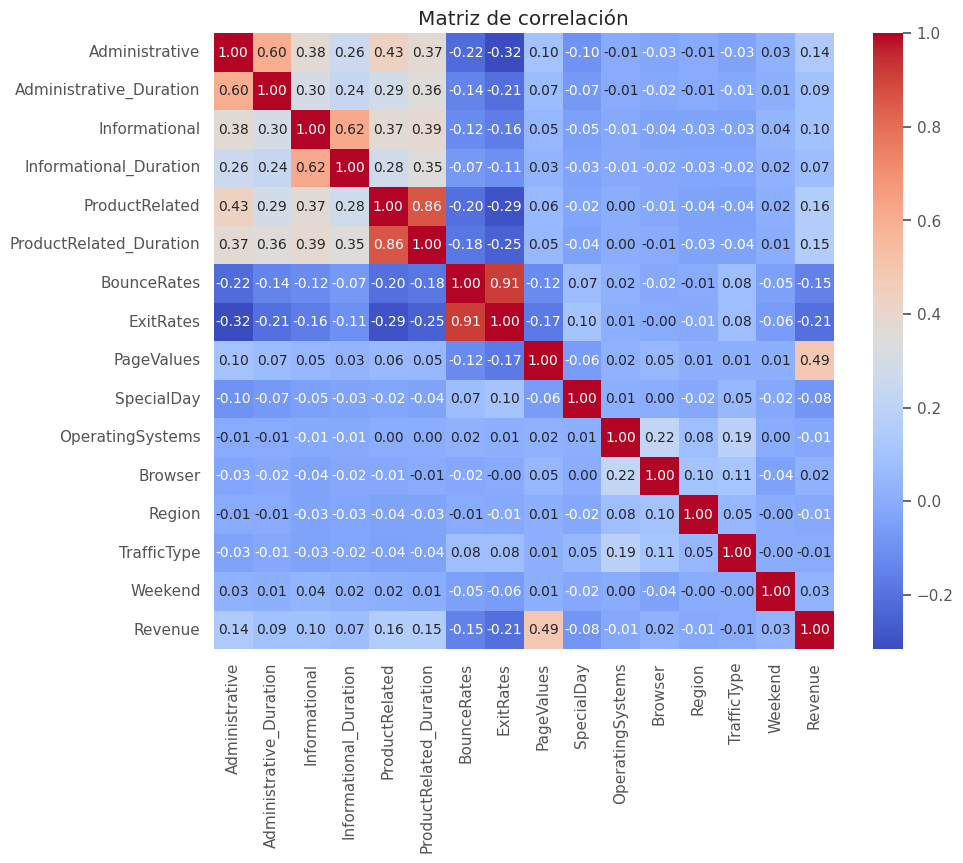

In [ ]:
#Analisis de correlacion
variables_numericas = df_online_shoppers_intention.select_dtypes(include=['float64', 'int64', 'bool'])
# Matriz de correlación
matriz_correlacion = variables_numericas.corr()
# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

El mapa de calor muestra que hay poca correlación entre las diferentes características, con la excepción de lo siguiente:

     Alta correlación entre:

      - BounceRates y ExitRates (0.91).
      - ProductRelated y ProductRelated_Duration (0.86).

     Correlaciones moderadas:

      - Administrative y Administrative DUration (0.6)
      - Informational & Informational Duration (0.62)
      - Page Values y Revenue (0.49)
     Correlación de variable objetico *Revenue*
      - No existe una alta correlación con las demas variables

**ANALISIS DE METRICAS**


   * Bounce Rates
   * Exit Rates
   * Page Values


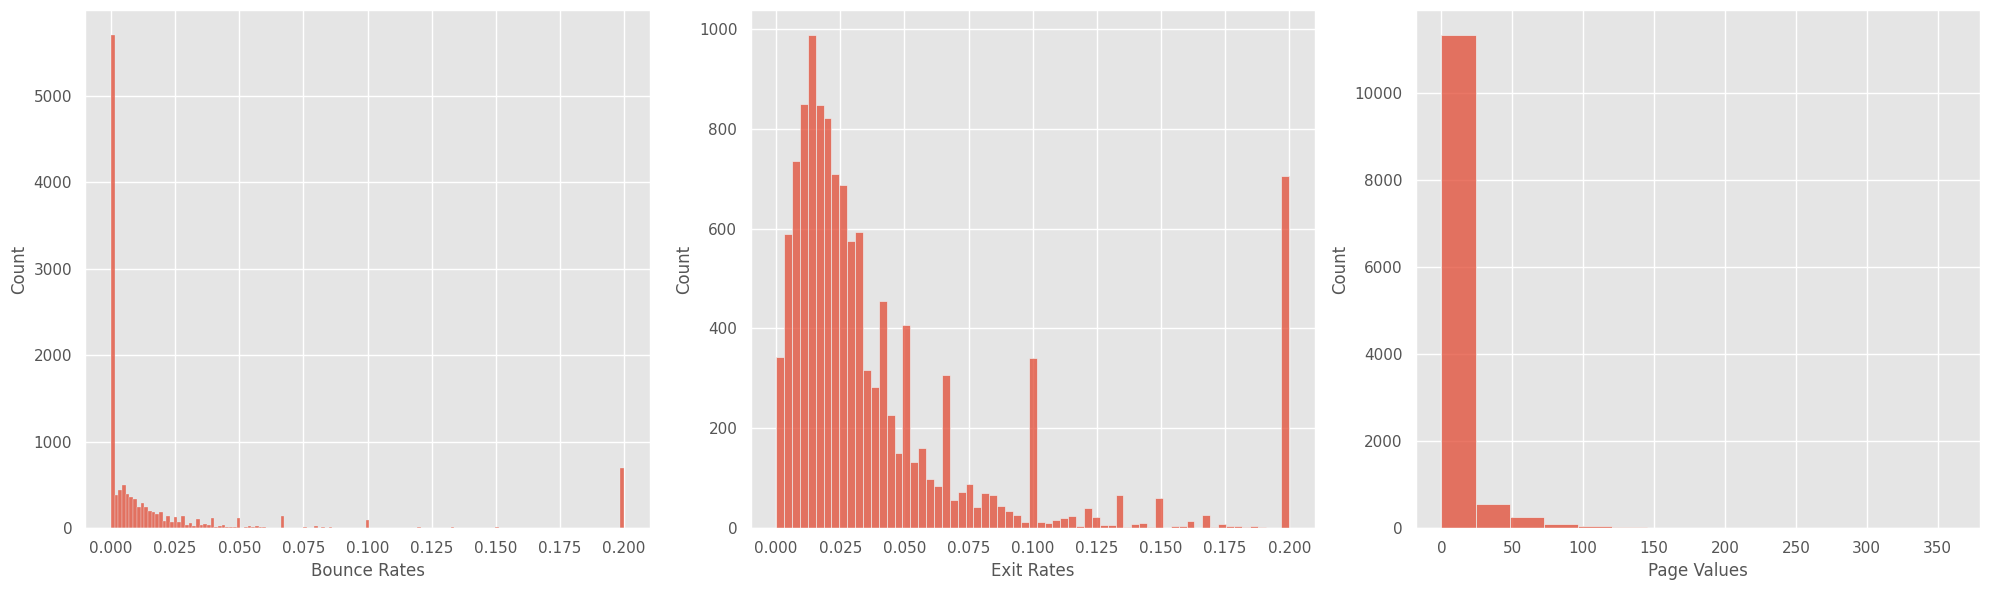

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(x=df_online_shoppers_intention['BounceRates'], ax=axes[0])
axes[0].set_xlabel('Bounce Rates')

sns.histplot(x=df_online_shoppers_intention['ExitRates'], ax=axes[1])
axes[1].set_xlabel('Exit Rates')

sns.histplot(x=df_online_shoppers_intention['PageValues'], ax=axes[2])
axes[2].set_xlabel('Page Values')

plt.tight_layout()
plt.show()


Los gráficos de distribución muestran lo siguiente:

* Las 3 características tienen distribuciones sesgadas hacia la derecha con muchos valores atípicos.

* La tasa de rebote promedio de la mayoría de nuestros puntos de datos es baja. Esta es una observación positiva ya que tasas altas identificarían que los visitantes no interactúan con el sitio web.

* Las tasas de salida tienen valores más altos que las tasas de rebote. Esto es de esperar, ya que podemos suponer que las páginas de confirmación de transacciones harán que aumente la tasa de salida promedio.

**ANÁLISIS  DE COMPRAS**

Distribución de la característica objetivo (Revenue)

In [ ]:
df_online_shoppers_intention.Revenue.value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [ ]:
revenue_ratio = df_online_shoppers_intention.Revenue.value_counts(normalize=True)
print(f"Procentaje de Compra realizada: \t{round(revenue_ratio[True]*100,2)} %\n")
print(f"Procentaje de Compra no realizada: \t{round(revenue_ratio[False]*100,2)} %\n")


Procentaje de Compra realizada: 	15.47 %

Procentaje de Compra no realizada: 	84.53 %



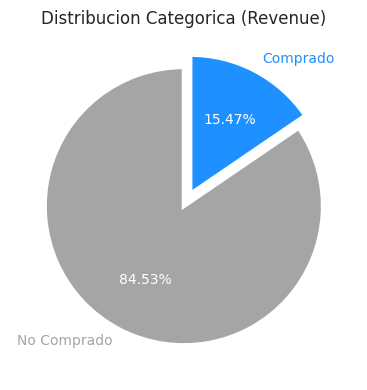

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

x=revenue_ratio

cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, len(x))))

colors[1]='dodgerblue'
labels = ['No Comprado','Comprado']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'medium'},
    startangle=90,
    colors=colors,
    explode=(0, 0.1))

for i, patch in enumerate(patches):
   texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=300)
ax.set_title('Distribucion Categorica (Revenue)', fontsize=12)
plt.tight_layout()

**OBVSERVACIONES**

Hay un desequilibrio en la variable de producción ("Ingresos"), donde la proporción de visitantes que no realizaron una compra respecto de los que la completaron es del 84,53% al 15,47% respectivamente.

**Compras por Tipo de Visitante**

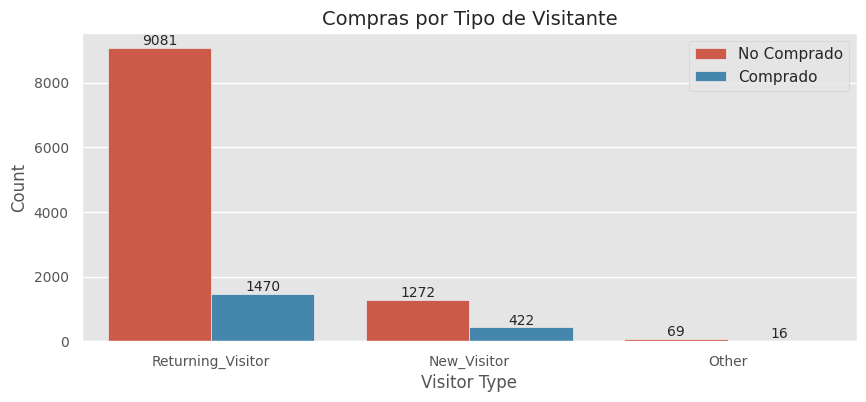

In [ ]:
plt.figure(figsize=(10,4))
plt.title("Compras por Tipo de Visitante", fontsize=14)
ax = sns.countplot(x='VisitorType', data=df_online_shoppers_intention, hue = 'Revenue')
ax.legend(labels=['No Comprado','Comprado'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Visitor Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Ingresos por mes**

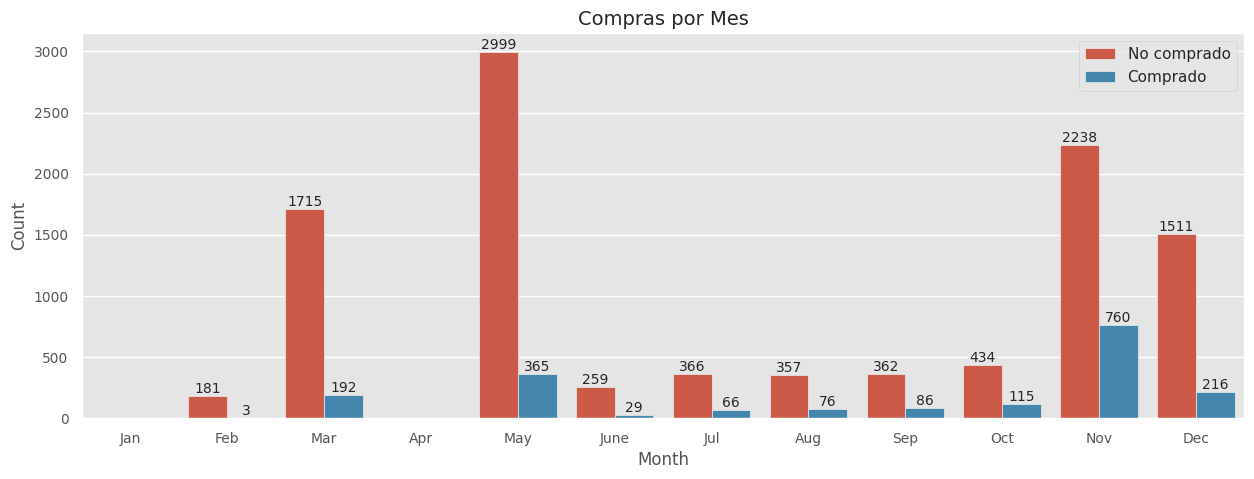

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Compras por Mes", fontsize=14)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']

ax = sns.countplot(x='Month', data=df_online_shoppers_intention, hue = 'Revenue', order=orderlist)
ax.legend(labels=['No comprado','Comprado'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**OBSERVACIONES**

* En enero y abril no se registraron visitas al sitio web.

* Muchas transacciones se realizan hacia finales de año, y noviembre y diciembre registran los ingresos más altos y terceros generados. Aunque estos meses no registran el mayor número de visitas a sitios web.

* Los cuatro (4) meses principales con más visitas son mayo, noviembre, marzo y diciembre.

**Ingresos por dia especial**

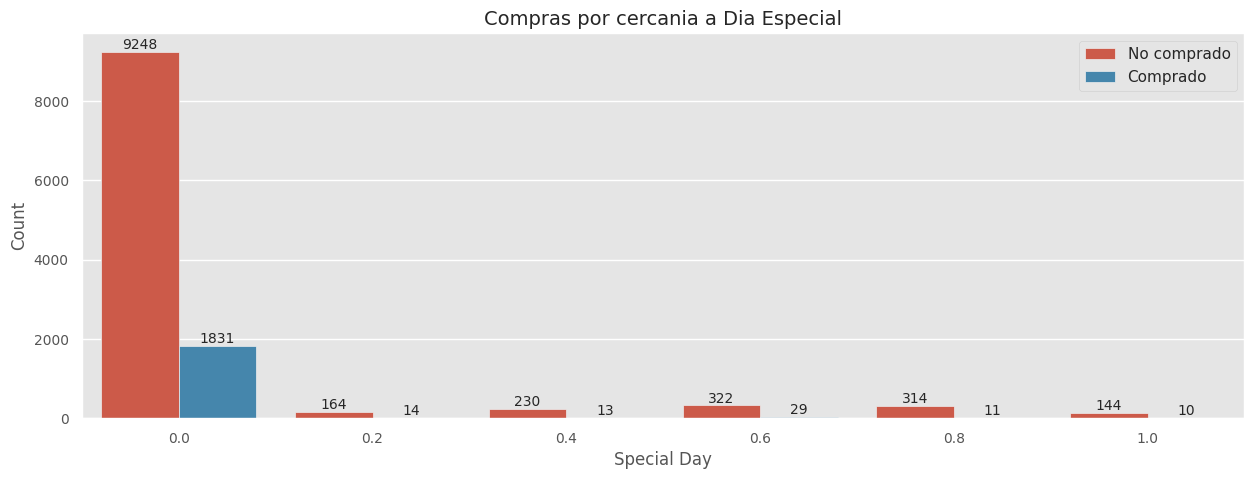

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Compras por cercania a Dia Especial", fontsize=14)

ax = sns.countplot(x='SpecialDay', data=df_online_shoppers_intention, hue = 'Revenue')
ax.legend(labels=['No comprado','Comprado'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Special Day", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Hubo significativamente más visitantes al sitio web e ingresos generados (compras completadas) en el Día Especial 0.0 en comparación con los otros días especiales.

**INGRESO POR BUSCADOR**

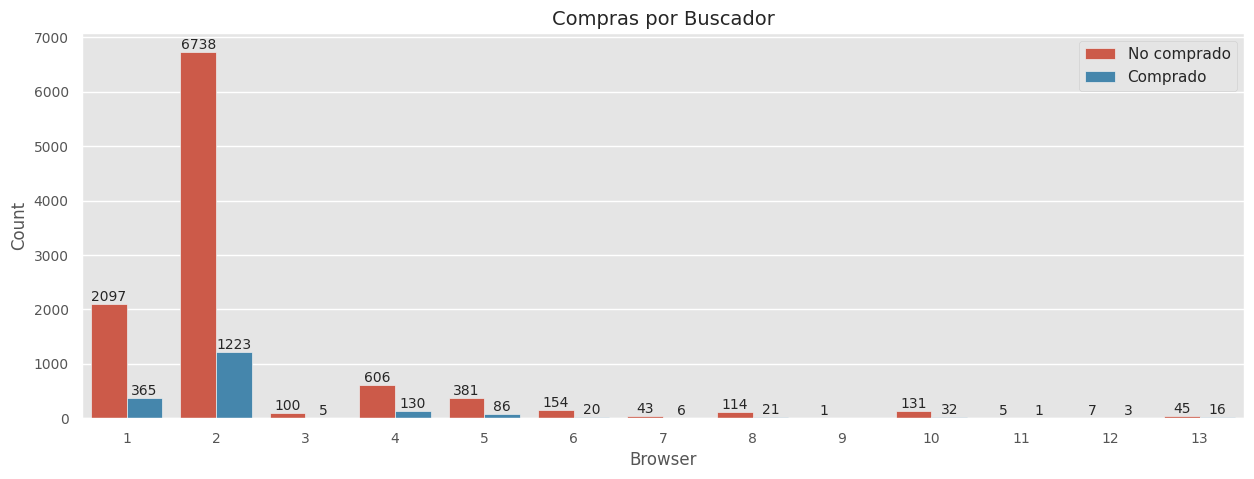

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Compras por Buscador", fontsize=14)

ax = sns.countplot(x='Browser', data=df_online_shoppers_intention, hue = 'Revenue')
ax.legend(labels=['No comprado','Comprado'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Browser", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**OBSERVACIONES**

En este caso se realiza un analisis de los vistantes por buscador y se hace una revision de los valores mas relevantes para su posterior análisis, en este caso los mas relevantes son [**1, 2, 4, 5, 6, 10**]

**Ingresos por tipo de página/duración**

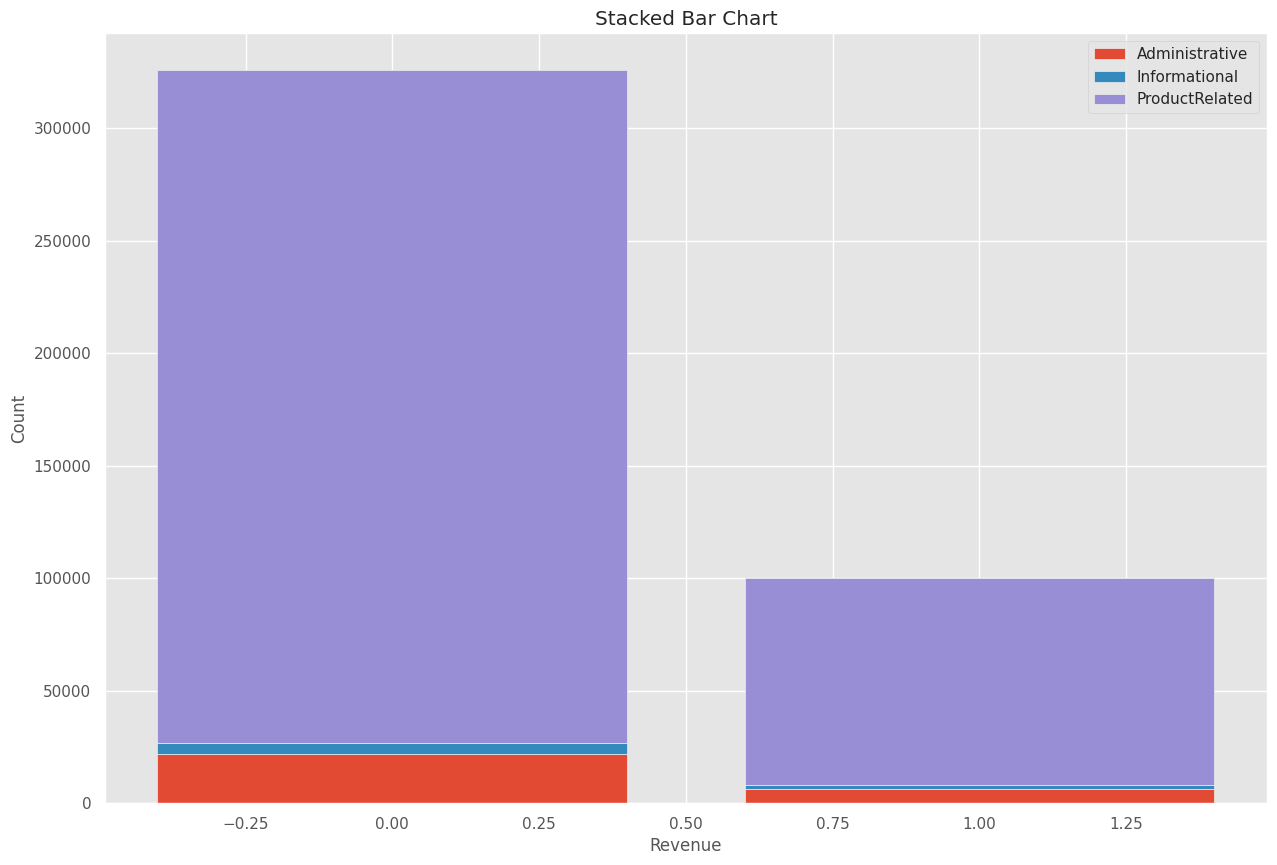

In [ ]:

# Agrupar los datos por la variable 'Revenue'

grouped_data = df_online_shoppers_intention.groupby('Revenue').agg({'Administrative': 'sum',
                      'Informational': 'sum',
                      'ProductRelated': 'sum'}).reset_index()
# Crear la figura y los ejes

fig, ax = plt.subplots(figsize=(15, 10))

# Graficar barras apiladas
bottom = None
for column in ['Administrative', 'Informational', 'ProductRelated']:
  ax.bar(grouped_data['Revenue'], grouped_data[column], label=column, bottom=bottom)
  if bottom is None:
    bottom = grouped_data[column]
  else:
    bottom += grouped_data[column]
# Agregar etiquetas y título
ax.set_xlabel('Revenue')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Chart')
# Mostrar la leyenda
ax.legend()
# Mostrar el gráfico
plt.show()



**OBSERVACIONES**

* Los visitantes tienden a estar más veces en la página relacionada, que en otras..

* Los visitantes que realizan una compra han pasado más veces en la página relacionada al producto que en otras paginas.

Como se observa que existen una mayor cantidad de visitas a las páginas relacionadas al producto, se obta por analizar la cantidad de tiempo que el visitante ocupa en los mismos y si este influye en la compra del compra de un producto. Se anlaiza entonces la variable *PageValues*

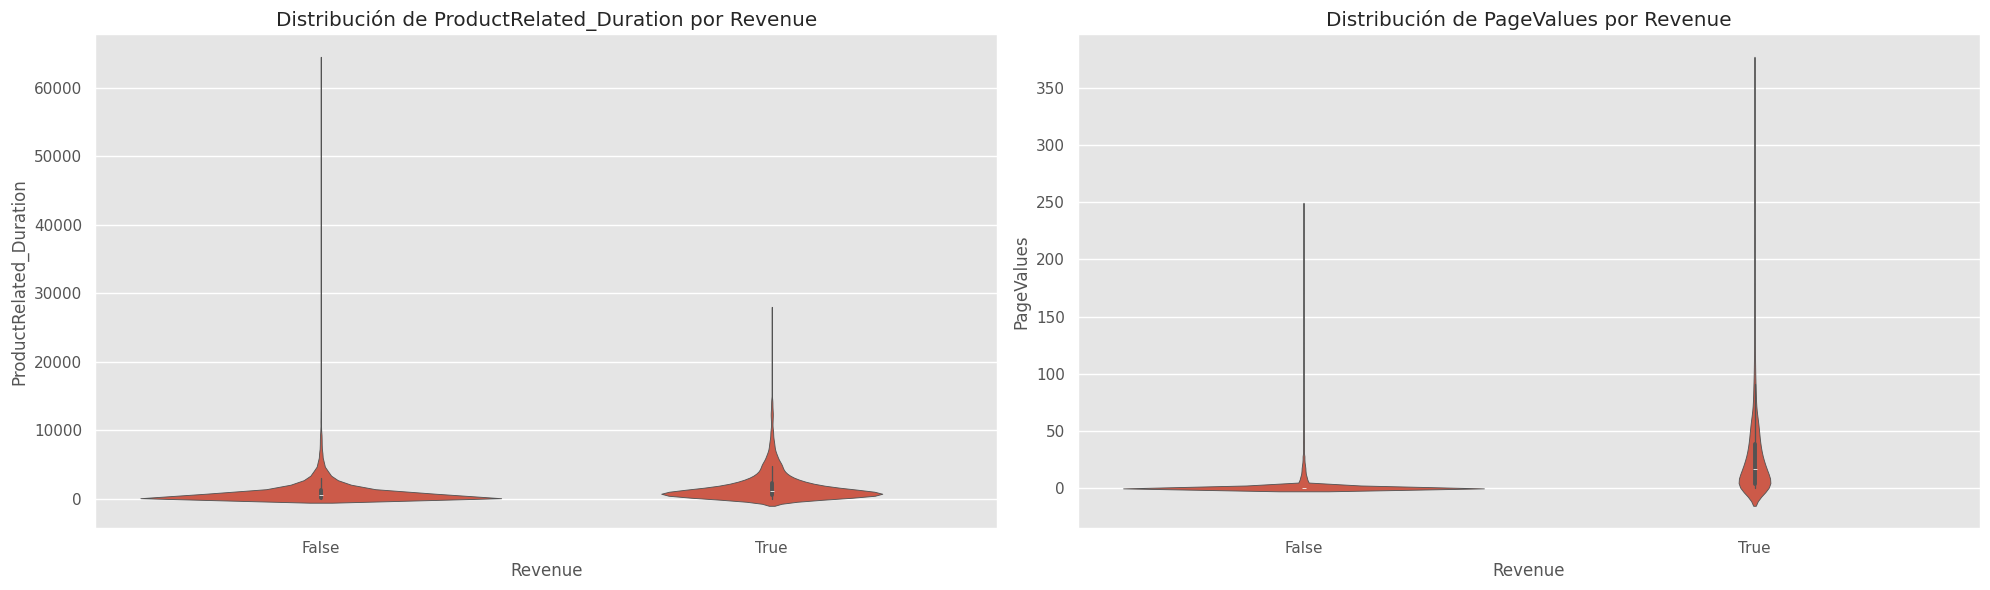

In [ ]:
# Crear la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Graficar la distribución de Administrative por Revenue
sns.violinplot(x='Revenue', y='ProductRelated_Duration', data=df_online_shoppers_intention, ax=axs[0])
axs[0].set_xlabel('Revenue')
axs[0].set_ylabel('ProductRelated_Duration')
axs[0].set_title('Distribución de ProductRelated_Duration por Revenue')

# Graficar la distribución de PageValues por Revenue
sns.violinplot(x='Revenue', y='PageValues', data=df_online_shoppers_intention, ax=axs[1])
axs[1].set_xlabel('Revenue')
axs[1].set_ylabel('PageValues')
axs[1].set_title('Distribución de PageValues por Revenue')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**OBSERVACIONES**

* No existe una aparente diferencia en los visitantes que pasan más tiempo en la pagina de productos y compran o no un producto.

* Existen una gran diferencia entre los usaurios con un promedio mayor de páginas visitas que compran un producto y los que no.

**Compras por tiempo de estadia en pagina de producto**

Se realiza un análisis de las regiones, tanto su distibución en los visitantes como su comparativa en la compra de un producto.

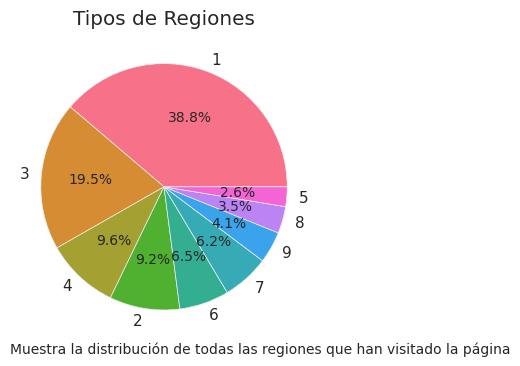

In [ ]:
# print(data['Region'].value_counts())
# Generar una paleta de colores con nueve tonos diferentes
palette = sns.color_palette('husl', 9)

# Convertir la paleta a una lista de códigos hexadecimales
palette_hex = palette.as_hex()
visitor_counts = df_online_shoppers_intention['Region'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(visitor_counts, labels=visitor_counts.index, autopct='%1.1f%%', colors=palette_hex)
plt.title('Tipos de Regiones')

# Agregar descripción en la parte inferior
plt.annotate('Muestra la distribución de todas las regiones que han visitado la página', (0,0), (0, -0.5), xycoords='axes fraction', textcoords='offset points', va='top')


plt.show()

**Observaciones**

Al analizar los resultados de la distribución de visitas por región, se destaca que las regiones 1 y 3 representan los mayores porcentajes de visitas a la página, con un 38.8% y un 19.5% respectivamente. Esto sugiere que estas dos regiones son los principales impulsores del tráfico en el sitio web. Además, es interesante observar que las regiones 4 y 2 comparten un porcentaje del 9.2%, lo que indica una participación significativa pero relativamente menor en comparación con las dos primeras regiones mencionadas. Por otro lado, las regiones 6, 7, 9 y 8 muestran porcentajes de visitas más modestos, oscilando entre el 6.5% y el 3.5%, mientras que la región 5 apenas contribuye con un 2.6% del total de visitas. Estos hallazgos destacan la importancia de las regiones 1 y 3 como principales mercados objetivo, mientras que también señalan oportunidades para mejorar la participación de las regiones menos representadas en el tráfico del sitio web.

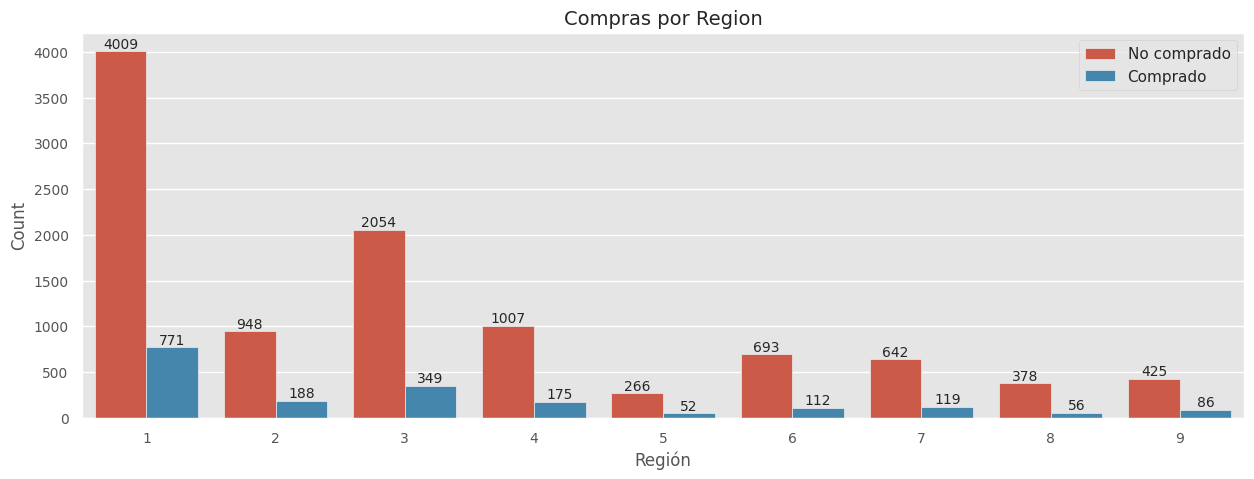

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Compras por Region", fontsize=14)

ax = sns.countplot(x='Region', data=df_online_shoppers_intention, hue = 'Revenue')
ax.legend(labels=['No comprado','Comprado'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Región", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**OBSERVACIONES**

* Existe un relación entre regiones y la compra de un producto.
* La región 1 es quien tiene un mayor porcentaje de compra

**Comparativa de tipo de tráfico con compras**

Se analiza la cantidad de compras por tipo de trafico

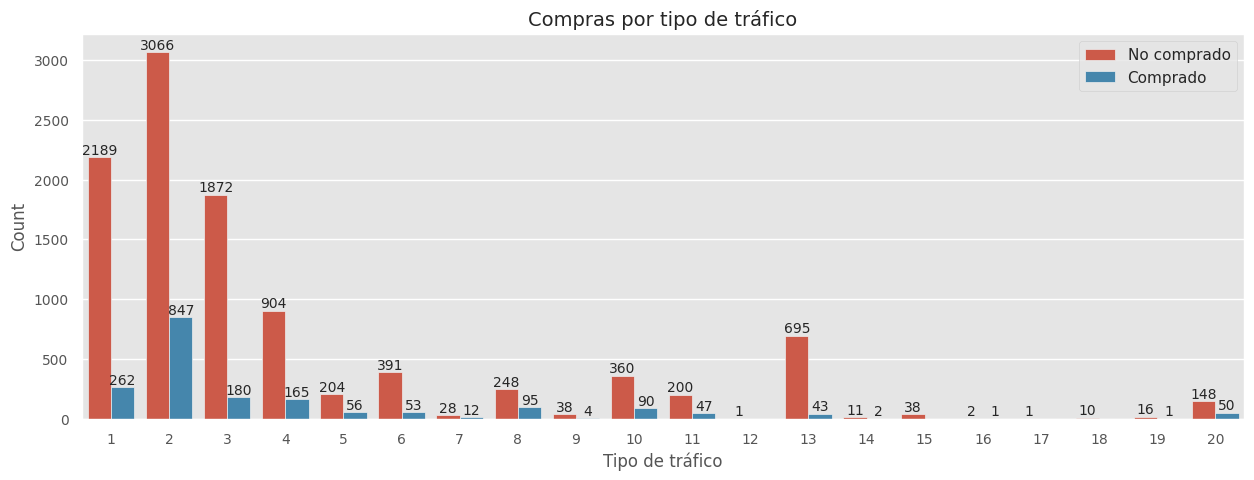

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Compras por tipo de tráfico", fontsize=14)

ax = sns.countplot(x='TrafficType', data=df_online_shoppers_intention, hue = 'Revenue')
ax.legend(labels=['No comprado','Comprado'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Tipo de tráfico", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


**OBSERVACIONES**

* Existe un relación entre tipo de tráfico y la compra de un producto.
* Se nota que dependiendo del tipo de tragico, existe mayor posibilidad de compra. El tipo de tráfico 2 es quien vende más.

## Limpieza de datos

In [ ]:
#datos faltantes

df_online_shoppers_intention.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [ ]:
# Revisión de registros con datos nulos
df_online_shoppers_intention[df_online_shoppers_intention.isna().any(axis=1)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,2,1,Returning_Visitor,False,False
1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,1,2,Returning_Visitor,False,False
1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,4,5,1,Returning_Visitor,False,False
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,False
1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,True,False
1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,6,1,Returning_Visitor,True,False
1475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
1476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,2,3,Returning_Visitor,False,False


In [ ]:
#porcentaje que representa missings en la data
(df_online_shoppers_intention.isnull().sum()/df_online_shoppers_intention.shape[0])*100

Administrative             0.113544
Administrative_Duration    0.113544
Informational              0.113544
Informational_Duration     0.113544
ProductRelated             0.113544
ProductRelated_Duration    0.113544
BounceRates                0.113544
ExitRates                  0.113544
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.000000
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64

**Observaciones:**

Se puede observar que existen valores con faltantes como son **Administrative,	Administrative_Duration, Informational,	Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates	ExitRatel**, los cuales representan casi la mitad de las variables a considerar. Además, considerando que son solo 14 registros que representan el 0.11% del total de los datos se procede a eliminarlos usando el metodo de pandas Dropna().

In [ ]:
#Eliminacion de los missings
df_sin_missings=df_online_shoppers_intention.dropna()

df_datos_faltantes=df_sin_missings.isnull().sum()

df_datos_faltantes

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**Validacion de duplicado**

Se verifican las filas duplicadas y su tratamiento

In [ ]:
# Verificar duplicados
duplicados = df_sin_missings.duplicated()
# Eliminar duplicados
df_sin_duplicados = df_sin_missings.drop_duplicates()
num_duplicados = len(df_sin_missings)-len(df_sin_duplicados)
# Verificar que los duplicados se han eliminado
print("Número de filas a eliinar:",num_duplicados )
print(f"Porcentajea eliminar: {round(num_duplicados*100/len(df_sin_missings),2)} %")

Número de filas a eliinar: 117
Porcentajea eliminar: 0.95 %


**OBSERVACIONES**

Para tener unos datos mas limpios se realizo una verificacion de duplicados y se realizo su respectivo tratambiendo de los datos, teniedo un 0.95% de datos a eliminar, siendo este porcentaje un valor no relevante de datos a ser eliminado

In [ ]:
df_sin_missings = df_sin_duplicados

**Eliminación de valores negativos**

Del estudio inicial existian valores negativos en las columnas de durción, referentes al tiempo, por lo que se opta por eliminarlas.

In [ ]:
# Obtener las columnas numéricas
columnas_numericas = df_sin_missings.select_dtypes(include=['float64', 'int64', 'bool'])

# Verificar las columnas seleccionadas
print("Columnas numéricas:")
print(list(columnas_numericas.columns))

# Filtrar las columnas con valores negativos
columnas_con_negativos = columnas_numericas.columns[(columnas_numericas < 0).any()]

# Verificar las columnas con valores negativos
print("Columnas con valores negativos:")
print(list(columnas_con_negativos))

# Eliminar las filas que contienen valores negativos en las columnas seleccionadas
df_sin_negativos = df_sin_missings.loc[(df_sin_missings[list(columnas_con_negativos)] >= 0).all(axis=1)]
num_negativas = len(df_sin_missings) - len(df_sin_negativos)
# Verificar el número de filas antes y después de eliminar los negativos
print("Porcentaje de filas a elimina de filas antes de eliminar negativos:", round(num_negativas*100/len(df_sin_missings),2),"%")


Columnas numéricas:
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Revenue']
Columnas con valores negativos:
['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
Porcentaje de filas a elimina de filas antes de eliminar negativos: 0.27 %


**OBSERVACIONES**

Se llevó a cabo un análisis adicional para detectar la presencia de valores negativos en el conjunto de datos, ya que estos no son adecuados para el análisis previsto. Tras realizar esta revisión, se encontró que el 0.27% de los datos presentan valores negativos. Dado que estos valores no son representativos para el análisis en cuestión, se han eliminado del conjunto de datos.

Esta acción garantiza la integridad de los datos utilizados para el análisis y ayuda a evitar posibles sesgos o interpretaciones incorrectas.





In [ ]:
df_sin_missings = df_sin_negativos

## Tratamiento de anomalias

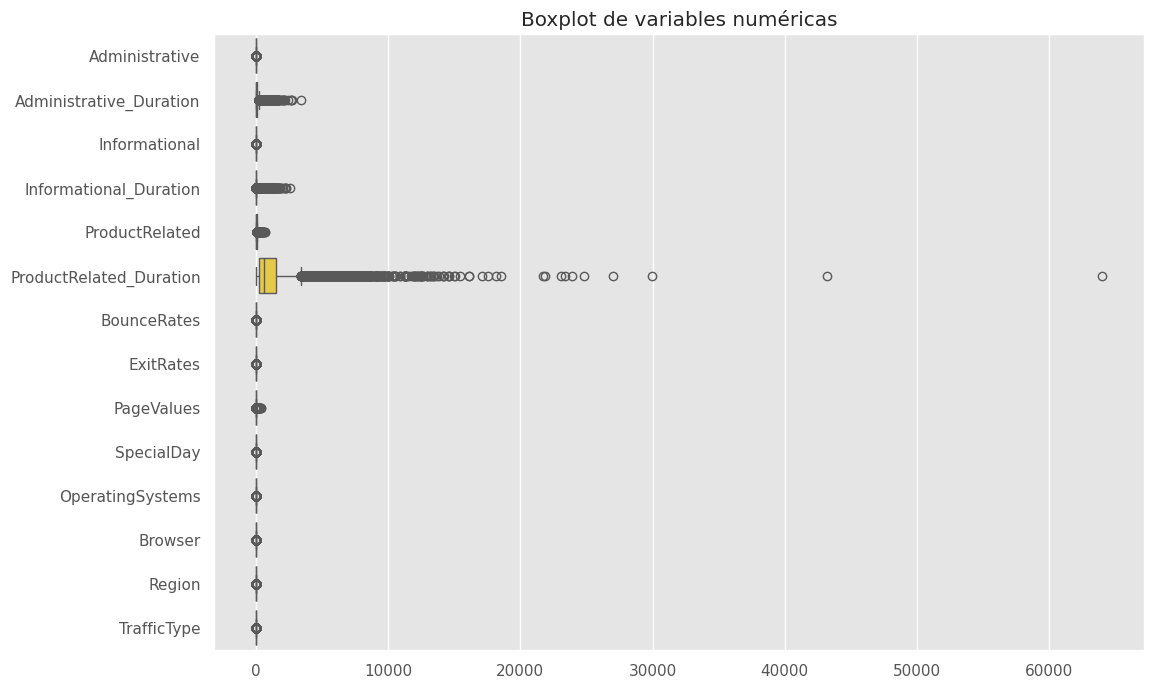

In [ ]:

# Visualizacion del Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_sin_missings.select_dtypes(include=['float64', 'int64']), orient='h', palette='Set2')
plt.title('Boxplot de variables numéricas')
plt.show()




**OBSERVACIONES**

Al observar el Boxplot, se destaca que **Administrative_Duration, Informal_Duration y ProducRelated_Duration** presentan una mayor variación y, por ende, son más susceptibles a la presencia de valores atípicos. Debido a esta característica, se ha decidido utilizarlos como variables principales para llevar a cabo el análisis.

Esta elección se basa en la capacidad de estas variables para proporcionar información relevante y significativa para el análisis propuesto, a pesar de su mayor susceptibilidad a valores anómalos. Utilizar estas variables permitirá obtener una comprensión más profunda y completa de los datos y sus posibles patrones o tendencias.

In [ ]:
# Definir las columnas para calcular el IQR
columnas_iqr = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']

# Calcular el IQR para cada columna
for columna in columnas_iqr:
    Q1 = df_sin_missings[columna].quantile(0.25)
    Q3 = df_sin_missings[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los umbrales para los outliers
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR

    # Filtrar los outliers
    df_sin_outliers = df_sin_missings[
        (df_sin_missings[columna] >= umbral_inferior) &
        (df_sin_missings[columna] <= umbral_superior)
    ]

# Verificar el resultado
print(df_sin_outliers.info())


<class 'pandas.core.frame.DataFrame'>
Index: 11216 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11216 non-null  float64
 1   Administrative_Duration  11216 non-null  float64
 2   Informational            11216 non-null  float64
 3   Informational_Duration   11216 non-null  float64
 4   ProductRelated           11216 non-null  float64
 5   ProductRelated_Duration  11216 non-null  float64
 6   BounceRates              11216 non-null  float64
 7   ExitRates                11216 non-null  float64
 8   PageValues               11216 non-null  float64
 9   SpecialDay               11216 non-null  float64
 10  Month                    11216 non-null  object 
 11  OperatingSystems         11216 non-null  int64  
 12  Browser                  11216 non-null  int64  
 13  Region                   11216 non-null  int64  
 14  TrafficType              11

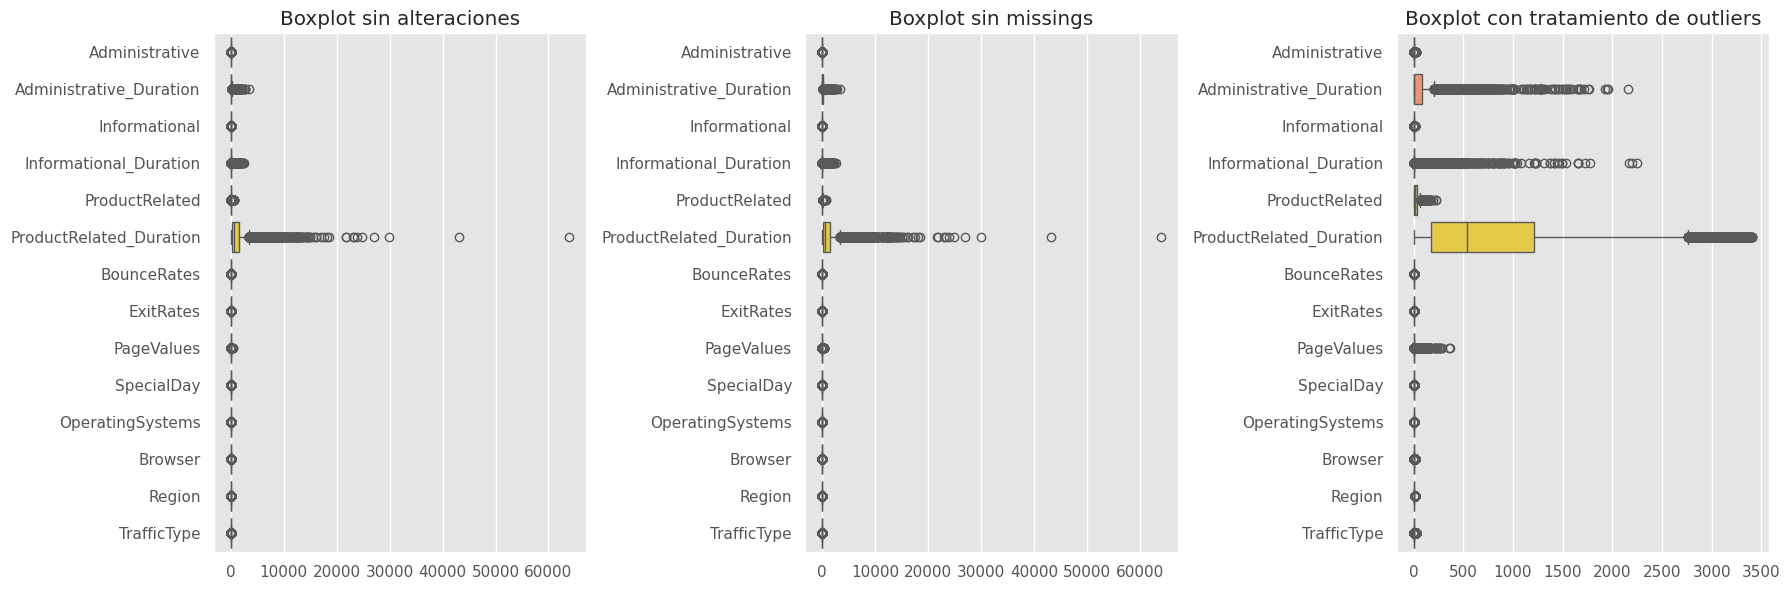

In [ ]:
#Visualizacion de del df sin haber realizado ningun cambio, quitando los missins y los outliers
# Configurar los subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Boxplot sin alteraciones
sns.boxplot(data=df_online_shoppers_intention.select_dtypes(include=['float64', 'int64']), orient='h', palette='Set2', ax=axes[0])
axes[0].set_title('Boxplot sin alteraciones')
# Boxplot de variables numéricas sin los missings
sns.boxplot(data=df_sin_missings.select_dtypes(include=['float64', 'int64']), orient='h', palette='Set2', ax=axes[1])
axes[1].set_title('Boxplot sin missings')
# Boxplot de variables numéricas con tratamiento de outliers
sns.boxplot(data=df_sin_outliers.select_dtypes(include=['float64', 'int64']), orient='h', palette='Set2', ax=axes[2])
axes[2].set_title('Boxplot con tratamiento de outliers')
# Mostrar los plots
plt.tight_layout()
plt.show()

**OBSERVACIONES**

Tras el tratamiento de los valores atípicos en **Administrative_Duration, Informal_Duration y ProductRelated_Duration**, se ha observado una reducción significativa en la variación de estos datos. Esta observación sugiere que estas columnas presentan una menor susceptibilidad a la presencia de valores anómalos después del tratamiento realizado en los outliers.

Esta reducción en la variabilidad de los datos indica una mayor consistencia en los valores, lo que puede resultar en una interpretación más precisa y confiable de los mismos. Al minimizar la influencia de los valores atípicos, se mejora la calidad del análisis y se facilita la identificación de patrones o tendencias significativas en los datos.

In [ ]:
# Tamaño antes de realziar cambios
print("Tamaño del df antes de quitar outliers:", df_online_shoppers_intention.shape[0])
# Tamaño despues de quitar los missings
print("Tamaño del df después de eliminar los missings:", df_sin_missings.shape[0])
#DataFrame después de quitar outliers
print("Tamaño del df después del tratamiento de los outliers:", df_sin_outliers.shape[0])

Tamaño del df antes de quitar outliers: 12330
Tamaño del df después de eliminar los missings: 12166
Tamaño del df después del tratamiento de los outliers: 11216


In [ ]:
# Calcular el porcentaje de eliminación
porcentaje_eliminacion_outliers = ((df_online_shoppers_intention.shape[0] - df_sin_outliers.shape[0]) / df_online_shoppers_intention.shape[0]) * 100
print(f"Se han quitado el {porcentaje_eliminacion_outliers:.2f}% de los valores despues del tratamiento de los outliers.")

Se han quitado el 9.03% de los valores despues del tratamiento de los outliers.


**OBSERVACIONES**

Tras la aplicación del tratamiento de los valores atípicos, se eliminó el 9.03% de todos los datos que se consideraron irrelevantes para el análisis. Este proceso de eliminación de datos irrelevantes asegura que los datos restantes sean apropiados y adecuados para el análisis previsto.

La eliminación de estos datos no solo contribuye a la mejora de la calidad de los datos utilizados en el análisis, sino que también ayuda a reducir la posibilidad de sesgos o interpretaciones erróneas que podrían surgir de la inclusión de datos irrelevantes o anómalos. De esta manera, se garantiza la fiabilidad y la validez de los resultados del análisis.

## Mapeo y transformación de los datos

In [ ]:
df_sin_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,11216.0,2.067315,2.993114,0.0,0.000000,1.000000,3.000000,24.000000
Administrative_Duration,11216.0,71.199383,153.960157,0.0,0.000000,3.500000,83.600000,2156.166667
Informational,11216.0,0.405581,1.087931,0.0,0.000000,0.000000,0.000000,16.000000
Informational_Duration,11216.0,25.612734,113.294883,0.0,0.000000,0.000000,0.000000,2252.033333
ProductRelated,11216.0,23.472985,23.357005,0.0,7.000000,16.000000,32.000000,223.000000
ProductRelated_Duration,11216.0,801.288936,798.775542,0.0,173.000000,532.375000,1207.823333,3408.266667
BounceRates,11216.0,0.021151,0.046194,0.0,0.000000,0.002151,0.017647,0.200000
ExitRates,11216.0,0.042814,0.046976,0.0,0.014286,0.026322,0.050000,0.200000
PageValues,11216.0,5.862060,18.736505,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,11216.0,0.063409,0.201400,0.0,0.000000,0.000000,0.000000,1.000000


**OBSERVACIONES**

Se lleva a cabo un resumen de los datos para todas las columnas con el fin de verificar si aún persisten datos no eliminados o valores atípicos que no hayan sido tratados. Esta verificación es crucial para garantizar la integridad de los datos utilizados en el análisis.

Al obtener un resumen de todas las columnas del conjunto de datos, se pueden identificar fácilmente posibles problemas, como valores faltantes o anomalías, que requieran atención adicional. Esto permite tomar decisiones informadas sobre los pasos siguientes en el análisis de los datos.

In [ ]:
df_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11216 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11216 non-null  float64
 1   Administrative_Duration  11216 non-null  float64
 2   Informational            11216 non-null  float64
 3   Informational_Duration   11216 non-null  float64
 4   ProductRelated           11216 non-null  float64
 5   ProductRelated_Duration  11216 non-null  float64
 6   BounceRates              11216 non-null  float64
 7   ExitRates                11216 non-null  float64
 8   PageValues               11216 non-null  float64
 9   SpecialDay               11216 non-null  float64
 10  Month                    11216 non-null  object 
 11  OperatingSystems         11216 non-null  int64  
 12  Browser                  11216 non-null  int64  
 13  Region                   11216 non-null  int64  
 14  TrafficType              11

### Fecha

In [ ]:
# Mapear fecha
mapeo_meses = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
               'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df = df_sin_outliers.copy()
# Aplicar el mapeo a la columna de meses
df['Month'] = df['Month'].map(mapeo_meses)
df['Month'].describe()

count    11216.000000
mean         7.560271
std          3.392437
min          2.000000
25%          5.000000
50%          7.000000
75%         11.000000
max         12.000000
Name: Month, dtype: float64

**OBSERVACIONES**

Se realizó un mapeo de los meses para estandarizar la representación de los datos y luego se aplicó esta transformación. Este proceso asegura coherencia en la representación de los meses en el conjunto de datos, mejorando su manipulación y análisis. Al hacerlo, se elimina la posibilidad de confusiones o inconsistencias en los datos, lo que a su vez mejora la calidad y fiabilidad del análisis. Además, esta transformación permite aprovechar de manera más efectiva la información contenida en los datos, facilitando la identificación de patrones o tendencias relevantes.

In [ ]:
df_map = df

### Tipo de visitante

Se realizó un mapeo según el **tipo de visitante**, donde se consideró que el número de visitantes **otros** era mínimo y se trató como un nuevo tipo de visitante asignándole el valor de 0, mientras que a los visitantes concurrentes se les asignó el valor de 1. Esta acción simplifica la clasificación de los tipos de visitantes y ayuda a distinguir claramente entre aquellos que son recurrentes y aquellos que son nuevos, facilitando así el análisis y la interpretación de los datos.

In [ ]:
#Mapear VisitorType
# Obtener los valores únicos de una columna
valores_unicos = df_map['VisitorType'].unique()

# Imprimir los valores únicos
print("Valores únicos de la columna:")
print(valores_unicos)

Valores únicos de la columna:
['Returning_Visitor' 'New_Visitor' 'Other']


In [ ]:
#mapeamos VisitorType
# Mapear fecha
mapeo_visitante = {'Returning_Visitor': 1,  'New_Visitor': 0, 'Other': 0}
df = df_map.copy()
# Aplicar el mapeo a la columna de meses
df['VisitorType'] = df['VisitorType'].map(mapeo_visitante)
df['VisitorType'].describe()

count    11216.000000
mean         0.843795
std          0.363066
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: VisitorType, dtype: float64

**OBSERVACIONES**

Después de mapear la columna "VisitorType", se observa que aproximadamente el 84.38% de los visitantes son de tipo "Returning_Visitor", mientras que el restante 15.62% son de tipo "New_Visitor" u "Other". Esto sugiere que la mayoría de los visitantes son recurrentes, lo que puede ser relevante para comprender el comportamiento y las preferencias de los usuarios en el sitio web o plataforma.

In [ ]:
df_map = df

### Realizacion de compra

In [ ]:
#Mapear Revenue
df = df_map.copy()
# Definir el diccionario de mapeo de True y False a 1 y 0
mapeo_bool = {True: 1, False: 0}

# Aplicar el mapeo a la columna
df['Revenue'] = df['Revenue'].map(mapeo_bool)
df['Revenue'].describe()

count    11216.000000
mean         0.144437
std          0.351547
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Revenue, dtype: float64

**OBSERVACIONES**

Después de mapear la columna "Revenue", se observa que alrededor del 14.44% de las visitas terminaron en una compra, mientras que el 85.56% no generó ninguna compra. Esto sugiere que la mayoría de las visitas no resultaron en transacciones de compra.

In [ ]:
df_map = df

### Dia festivo

Se observó que durante los días festivos, existe una alta probabilidad de realizar compras cuando el valor de cierta variable es 0, pero esta probabilidad disminuye cuando dicho valor es diferente de 0. Por esta razón, se decide modificar el valor de la variable de 0 a 2 cuando sea diferente de 0. Con esto, se señala una mayor probabilidad de realizar compras durante los días festivos.

In [ ]:
# Cambio de dia festivo
# Definir la función lambda para mapear los valores
mapeo_columna = lambda x: 1 if x == 0 else 0
df = df_map.copy()
# Aplicar el mapeo a la columna
df['SpecialDay'] = df['SpecialDay'].map(mapeo_columna)
df['SpecialDay'].describe()

count    11216.000000
mean         0.894882
std          0.306719
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: SpecialDay, dtype: float64

**OBSERVACIONES**

Después de realizar el cambio en la columna "SpecialDay", se observa que aproximadamente el 89.49% de los registros no corresponden a días festivos, mientras que el restante 10.51% sí lo hacen. Esto sugiere que la mayoría de los registros no están asociados con los días festivos, lo que puede ser relevante para comprender el comportamiento de los usuarios en diferentes momentos del año.

In [ ]:
df_map = df

## Análisis de reducción de dimensión

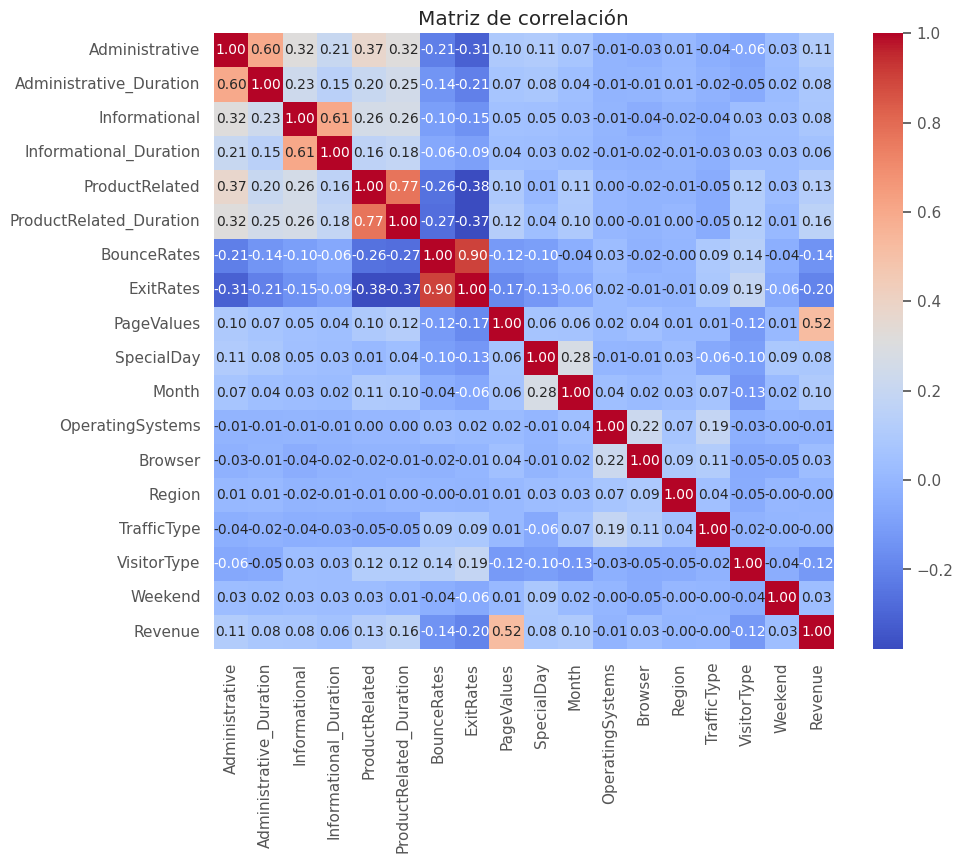

In [ ]:
# Realizamos una matriz de correlacion para verificar el mejoramiento o no de las relaciones
matriz_correlacion = df_map.corr()
# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

La corelación se elevado en varios campos. El mayor es la variable **PageValues**. En consideración al análisis descriptivo se ha tomado la decición de eliminar las siguientes columnas:

- **Administrative, Administrative_Duration, Informational, Informationa_Duration, ProductRelated, ProductRelate_Duration:** Se eliminan ya que su relevacia en compración con la realización de compra como se observa en la sección descriptiva. Su peso se puede resumer y evidenciar en la variable **PageValues**.
- **OperatingSystems,Browser,Weekend:** Se eliminan por la falta de relevancia en las comprar. Si bien, no se profundizo en su analisis a excepción de Browser, mediante la matriz de correlación muestran una incidencia baja.
- **BounceRates,ExitRates:** Se eliminan en base a la matriz de correlacion, al ser esta negativa y si estas son tiempos de navegación se contrapone con la cariables **PageValues**. demás esta puede englobar a las demas.

In [ ]:
df_clean = df_map[['PageValues','SpecialDay','Month','Region','TrafficType','VisitorType','Revenue']]
df_clean.head()

,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Revenue
0,0.0,1,2,1,1,1,0
1,0.0,1,2,1,2,1,0
3,0.0,1,2,2,4,1,0
4,0.0,1,2,1,4,1,0
5,0.0,1,2,1,3,1,0


**OBSERVACIONES**

Después de limpiar el DataFrame y seleccionar las columnas relevantes, obtenemos un nuevo DataFrame llamado `df_clean` que contiene las columnas 'PageValues', 'SpecialDay', 'Month', 'Region', 'TrafficType', 'VisitorType' y 'Revenue'. Al observar las primeras filas de este DataFrame limpio, podemos ver que se han eliminado las otras columnas y que los valores en estas columnas seleccionadas han sido transformados. Por ejemplo, la columna 'SpecialDay' ahora contiene valores de 1 y 0, donde 1 indica que no es un día festivo y 0 indica que sí lo es. Además, la columna 'Revenue' ahora contiene valores de 0 y 1, donde 0 indica que no hubo transacción de compra y 1 indica que sí la hubo. Este DataFrame limpio y transformado es más adecuado para su posterior análisis.

## Estandarización de los datos.

Hay modelos que parten de la hipótesis que los datos son centrados y, por tanto, se necesita estandarizar. Suele ser una buena práctica porque no suele perjudicar, asi que se obta por realizarlo. Además permite una mejor rendimiento en la utilización de redes neronales, que aunque, no es necesario permiten tener una mejor predicción con menor entrenamiento.

In [ ]:
# Seleccionar todas las columnas excepto 'Revenue' como características para estandarizar.  Revenue es la columna objetivo.
caracteristicasX = df_clean.drop('Revenue', axis=1)
objetivoY = df_clean['Revenue']
# Crear un objeto StandardScaler
scaler = StandardScaler()

# Aplicar la estandarización a las características seleccionadas
standardized_features = scaler.fit_transform(caracteristicasX)

Después de aplicar la estandarización, **standardized_features** contendrá las características estandarizadas de las caracteristicasX. El y al ser el objetivo y solo contar con 1 y 0 no se estandariza.

Aquí está la interpretación de los resultados:

Valores estandarizados (standardized_features):
standardized_features es un array NumPy que contiene las características estandarizadas.
Cada columna de standardized_features tiene una media de aproximadamente cero y una desviación estándar de uno.

Se crea un dataFrame con los datos estandarizados.

In [ ]:
# Crear un nuevo DataFrame con las características estandarizadas
df_standardized = pd.DataFrame(standardized_features, columns=caracteristicasX.columns)
df_standardized

,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType
0,-0.312882,0.342732,-1.639093,-0.903408,-0.772113,0.430259
1,-0.312882,0.342732,-1.639093,-0.903408,-0.524393,0.430259
2,-0.312882,0.342732,-1.639093,-0.487728,-0.028955,0.430259
3,-0.312882,0.342732,-1.639093,-0.903408,-0.028955,0.430259
4,-0.312882,0.342732,-1.639093,-0.903408,-0.276674,0.430259
...,...,...,...,...,...,...
11211,0.340509,0.342732,1.308772,-0.903408,-0.772113,0.430259
11212,-0.312882,0.342732,1.013986,-0.903408,0.961922,0.430259
11213,-0.312882,0.342732,1.013986,-0.903408,2.200518,0.430259
11214,-0.312882,0.342732,1.013986,-0.072047,1.705079,0.430259


### Interpretación de los resultados estandarizados


En el DataFrame df_standardized, cada columna representa una característica estandarizada del DataFrame original df_clean.

Las características estandarizadas tienen una media cercana a cero y una desviación estándar cercana a uno, lo que significa que están en la misma escala y son más comparables entre sí.

La estandarización facilita el entrenamiento de modelos de aprendizaje automático, ya que evita que las características con escalas más grandes dominen sobre las características con escalas más pequeñas.

## Division de los datos


Se toma como X al dataframe estandarizado **standardized_features** y Y al dataframe **objetivoY**

In [ ]:
X = standardized_features.copy()  # CaracterísticasX
y = objetivoY.copy()  # Variable objetivo (y)

### Dividir los datos en conjuntos de entrenamiento (train) y prueba (test):
Se usa train_test_split para dividir los datos en train y test.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (8972, 6)
Dimensiones de X_test: (2244, 6)
Dimensiones de y_train: (8972,)
Dimensiones de y_test: (2244,)


*   standardized_features: Características estandarizadas.
*   y: Variable objetivo.
*   test_size=0.2: Divide los datos de forma que el 20% sea para prueba (test) y el 80% para entrenamiento (train).
*   random_state=42: Semilla aleatoria para garantizar reproducibilidad.





---




*   X_train y y_train son los datos de entrenamiento que se utilizan para ajustar modelos.
*   X_test y y_test son los datos de prueba que se utilizan para evaluar el rendimiento del modelo.
*   Dividir los datos en conjuntos de entrenamiento y prueba ayuda a evaluar el rendimiento del modelo en datos no vistos (prueba) y evitar el sobreajuste.






La división de los datos en conjuntos de entrenamiento y prueba es fundamental para evaluar el rendimiento del modelo. El conjunto de entrenamiento se utiliza para ajustar el modelo, mientras que el conjunto de prueba se utiliza para evaluar su rendimiento en datos no vistos.

## Aplicación de modelos

### Regresión logística

#### Optimizando C y class_weight con GridSearch

In [ ]:
#Definir el modelo de regresión logística:
model = LogisticRegression()
#Configura la validación cruzada y la búsqueda de hiperparámetros:
param_grid = {'C':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,0.09],
              "class_weight":['balanced', None]}  # Valores para el hiperparámetro 'C'

Con GridSearchCV se realiza una optimización. Esta función lo que hace es ajustar el modelo que se pasa como argumento con todas las combinaciones posibles de los parámetros. En este caso, todas las combinaciones de C y class_weights.

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc')
#param_grid: Define los valores posibles para el hiperparámetro C de la regresión logística.
#cv=5: Especifica la estrategia de validación cruzada (en este caso, validación cruzada con 5).
#Entrenar el modelo con validación cruzada y búsqueda de hiperparámetros:
grid_search.fit(X_train, y_train)

print("Mejor parámetro C:", grid_search.best_params_)
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

Mejor parámetro C: {'C': 0.09, 'class_weight': 'balanced'}
Mejor puntuación de validación cruzada: 0.8949659470284737


*   grid_search.best_params_: Muestra los mejores valores de los hiperparámetros encontrados durante la búsqueda en la cuadrícula.

*   grid_search.best_score_: Muestra la mejor puntuación de validación cruzada obtenida durante el entrenamiento.




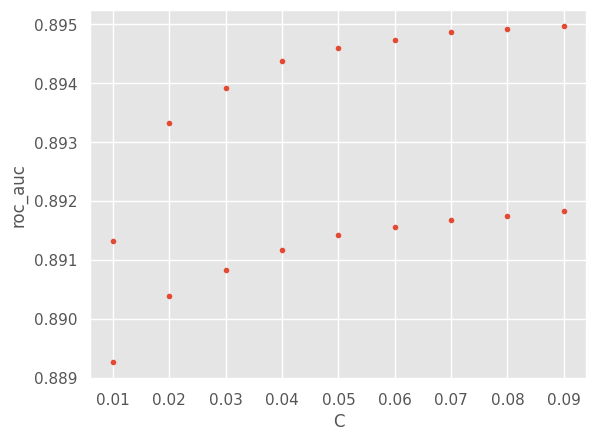

In [ ]:
df_search = pd.DataFrame.from_dict(grid_search.cv_results_)
plt.xlabel('C')
plt.ylabel('roc_auc')
_ = plt.plot( df_search['param_C'], df_search['mean_test_score'], '.')

Seleccionamos los mejores parámetros obtenidos en el paso anterior.

In [ ]:
reg_log =  LogisticRegression(C=grid_search.best_params_['C'],
                              class_weight=grid_search.best_params_['class_weight'])

Ajuste de los datos de entrenamiento

In [ ]:
reg_log.fit(X_train, y_train)

LogisticRegression(C=0.09, class_weight='balanced')

#### Test de modelo optimizado



In [ ]:
y_test_pred_prob = reg_log.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(y_test == 0)[0]]

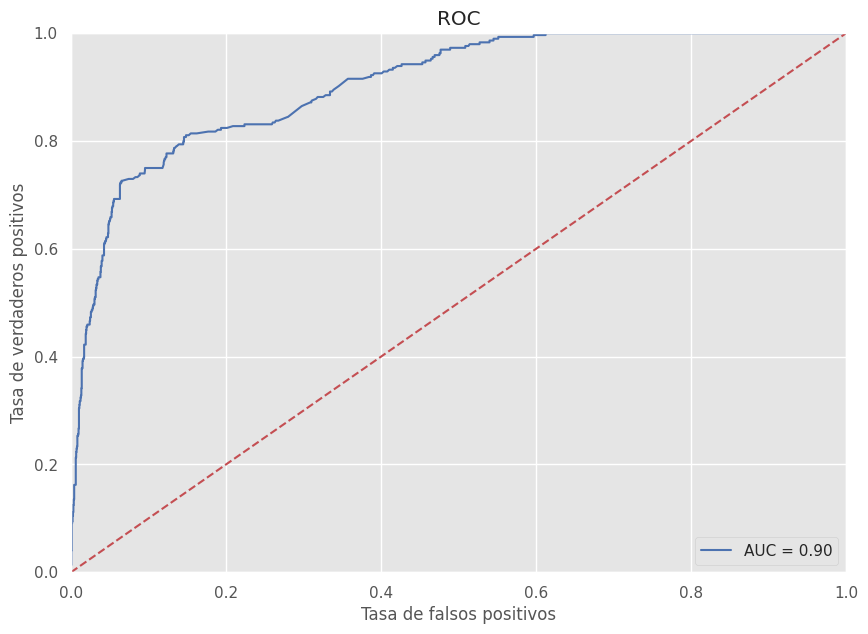

In [ ]:
preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(10,7))
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Tasa de verdaderos positivos')
plt.xlabel('Tasa de falsos positivos')
plt.show()

Graficación de probabilidad

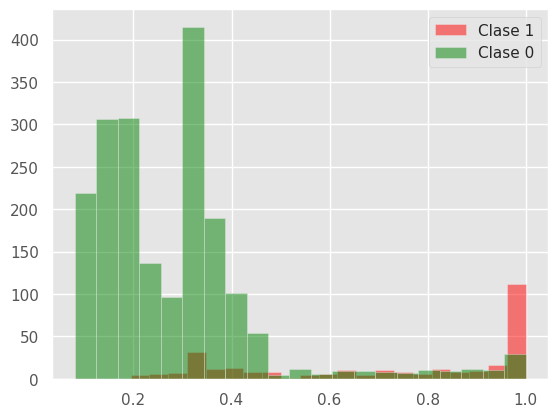

In [ ]:
doble_hist(y_test_pred_prob_pos[:, 1], y_test_pred_prob_neg[:, 1], n_bins=21, density=0)

Se representa en verde las probabilidades que asigna el modelo a los datos que son 0s (cuanto más cerca de 0 la distribución verde mejor) y en rojo las probabilidades asignadas a los datos que son 1s (cuanto más cerca esté de 1 la distribución roja mejor).

#### Umbralización de predicciones

Las probabilidades que devuelve el modelo son valores continuos entre 0 y 1. Para pasarlo a 0s y a 1s es necesario usar un umbral de corte. Todo lo que sea mayor que el umbral será predicción = 1, y lo que sea menor será predicción = 0

In [ ]:
umbral = 0.6
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

In [ ]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(y_test, y_umbralizadas),2)))
print("Sensitividad\t{}".format(round(metrics.recall_score(y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(y_test, y_umbralizadas),2)))

Matriz de confusión
 [[1846  102]
 [ 100  196]]

Accuracy	0.91
Sensitividad	0.66
Precisión	0.66


In [ ]:
acc_reg_log = round(metrics.accuracy_score(y_test, y_umbralizadas),2)
sen_reg_log = round(metrics.recall_score(y_test, y_umbralizadas),2)
pre_reg_log = round(metrics.precision_score(y_test, y_umbralizadas),2)

### Red neuronal MLPClassifier



Se especifica los parámetros de la red neuronal y con GridSearchCV se realizará una optimización. Esta función lo que hace es ajustar el modelo que se pasa como argumento con todas las combinaciones posibles de los parámetros.

In [ ]:
modelo = MLPClassifier()
parametros = {'solver': ['lbfgs'],
              'max_iter': [100,200,300,500], # Iteraciones máximas en cada red
              'alpha': 10.0 ** -np.arange(1, 10), # Parámetro de regularización L2 para evitar sobreajuste
              'hidden_layer_sizes':np.arange(30, 35), # Número de neuronas en cada capa
              'random_state':[0]}

In [ ]:
modelo_gs = GridSearchCV(modelo, param_grid=parametros, cv = 3,
                         scoring='roc_auc', n_jobs=-1, verbose=10)
modelo_gs.fit(X_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'hidden_layer_sizes': array([30, 31, 32, 33, 34]),
                         'max_iter': [100, 200, 300, 500], 'random_state': [0],
                         'solver': ['lbfgs']},
             scoring='roc_auc', verbose=10)

In [ ]:
parametros_rn = modelo_gs.best_params_
print("Mejores parametros de red neuronal")
print(f"alpha: {parametros_rn['alpha']}")
print(f'capas ocultas: {parametros_rn["hidden_layer_sizes"]}')
print(f"maximas iteraciones: {parametros_rn['max_iter']}")
print("\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

Mejores parametros de red neuronal
alpha: 1e-08
capas ocultas: 32
maximas iteraciones: 100

ROC AUC: 0.92


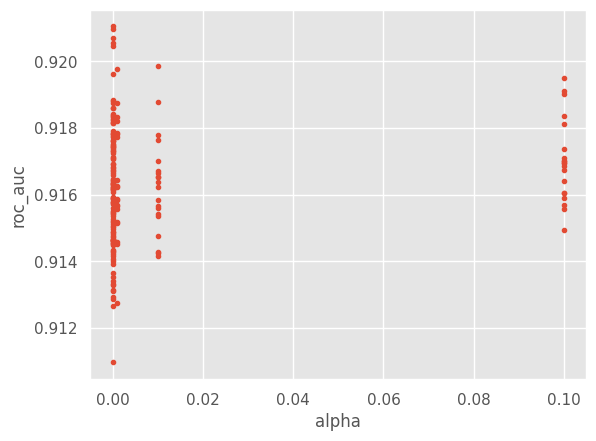

In [ ]:
df_search = pd.DataFrame.from_dict(modelo_gs.cv_results_)
plt.xlabel('alpha')
plt.ylabel('roc_auc')
_ = plt.plot( df_search['param_alpha'], df_search['mean_test_score'], '.')

Seleccionamos los mejores parametros

In [ ]:
mejor_modelo = MLPClassifier(**modelo_gs.best_params_, verbose=10)

Ajustamos el modelo con mejores parámetros

In [ ]:
mejor_modelo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-08, hidden_layer_sizes=32, max_iter=100, random_state=0,
              solver='lbfgs', verbose=10)

#### Test de modelo optimizado

In [ ]:
y_test_pred_prob = mejor_modelo.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(y_test == 0)[0]]

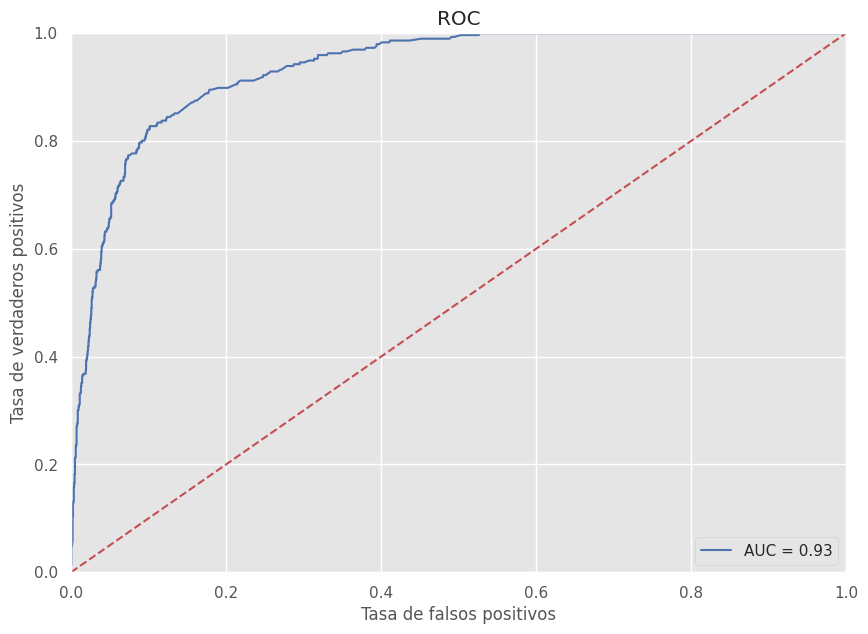

In [ ]:
preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Tasa de verdaderos positivos')
plt.xlabel('Tasa de falsos positivos')
plt.show()

Gaficación de probabilidad

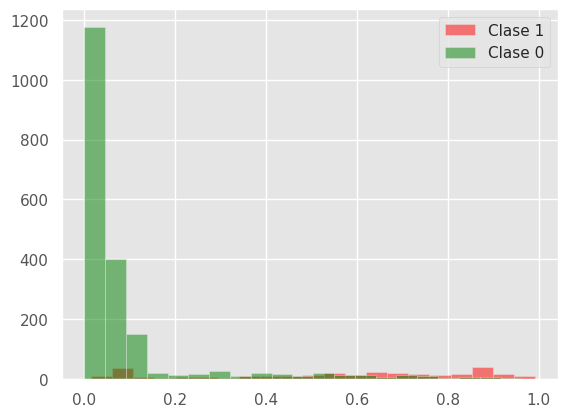

In [ ]:
doble_hist(y_test_pred_prob_pos[:, 1], y_test_pred_prob_neg[:, 1], n_bins=21, density=0)

Se representa en verde las probabilidades que asigna el modelo a los datos que son 0s (cuanto más cerca de 0 la distribución verde mejor) y en rojo las probabilidades asignadas a los datos que son 1s (cuanto más cerca esté de 1 la distribución roja mejor).

#### Umbralización de predicciones

Las probabilidades que devuelve el modelo son valores continuos entre 0 y 1. Para pasarlo a 0s y a 1s es necesario usar un umbral de corte. Todo lo que sea mayor que el umbral será predicción = 1, y lo que sea menor será predicción = 0

In [ ]:
umbral = 0.5
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

In [ ]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(y_test, y_umbralizadas),2)))
print("Sensitividad\t{}".format(round(metrics.recall_score(y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(y_test, y_umbralizadas),2)))

Matriz de confusión
 [[1853   95]
 [ 105  191]]

Accuracy	0.91
Sensitividad	0.65
Precisión	0.67


In [ ]:
acc_mlpc = round(metrics.accuracy_score(y_test, y_umbralizadas),2)
sen_mlpc = round(metrics.recall_score(y_test, y_umbralizadas),2)
pre_mlpc = round(metrics.precision_score(y_test, y_umbralizadas),2)

### Support Vector Classifier

Se especifica los parámetros de SVC y con GridSearchCV se realizará una optimización. Esta función lo que hace es ajustar el modelo que se pasa como argumento con todas las combinaciones posibles de los parámetros.

In [ ]:
# Definir el modelo de SVM:
model = SVC()
# Definir la rejilla de hiperparámetros:
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Valores para el parámetro de regularización C
    'kernel': ['linear', 'poly'],  # Tipos de kernel
    'gamma': ['scale', 'auto'],  # Valores para el parámetro gamma
    'class_weight': ['balanced', None]  # Opciones para el balance de clases
}

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='roc_auc')
#param_grid: Define los valores posibles para el hiperparámetro para SVM.
#cv=5: Especifica la estrategia de validación cruzada (en este caso, validación cruzada con 5).
#Entrenar el modelo con validación cruzada y búsqueda de hiperparámetros:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': ['balanced', None],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly']},
             scoring='roc_auc')

In [ ]:
parametros_svc = grid_search.best_params_
print("Mejor parámetro C:", parametros_svc['C'])
print("Mejor kernel:", parametros_svc['kernel'])
print("Mejor gamma:", parametros_svc['gamma'])
print("Mejor class_weight:", parametros_svc['class_weight'])
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

Mejor parámetro C: 10
Mejor kernel: linear
Mejor gamma: scale
Mejor class_weight: None
Mejor puntuación de validación cruzada: 0.9015581325337884


SVC(kernel='linear') con este comando se hace que el modelo pueda usar un kernel lineal,similar a la regresión logística.C=1.0 es el  parámetro de regularización, donde valores más altos de C indican una penalización más fuerte por errores de clasificación.
random_state=42 se utiliza para garantizar reproducibilidad en los resultados.

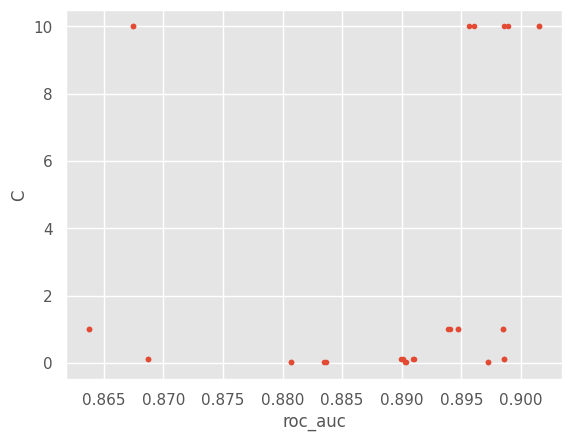

In [ ]:
df_search = pd.DataFrame.from_dict(grid_search.cv_results_)
plt.xlabel('roc_auc')
plt.ylabel('C')
_ = plt.plot(df_search['mean_test_score'], df_search['param_C'], '.')

El eje x representa  el puntaje ROC-AUC (roc_auc) y y el valor de C.

### Entrenamiento con valores óptimos

In [ ]:
svc_model = SVC(kernel=grid_search.best_params_['kernel'], C=grid_search.best_params_['C'],
                gamma = grid_search.best_params_['gamma'],
                class_weight=grid_search.best_params_['class_weight'],probability=True,)

In [ ]:
svc_model.fit(X_train, y_train)

SVC(C=10, kernel='linear', probability=True)

####Test de modelo optimizado

In [ ]:
y_test_pred_prob = svc_model.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(y_test == 0)[0]]

Utilizamos el método predict_proba() para obtener las probabilidades de predicción para los datos de prueba X_test.

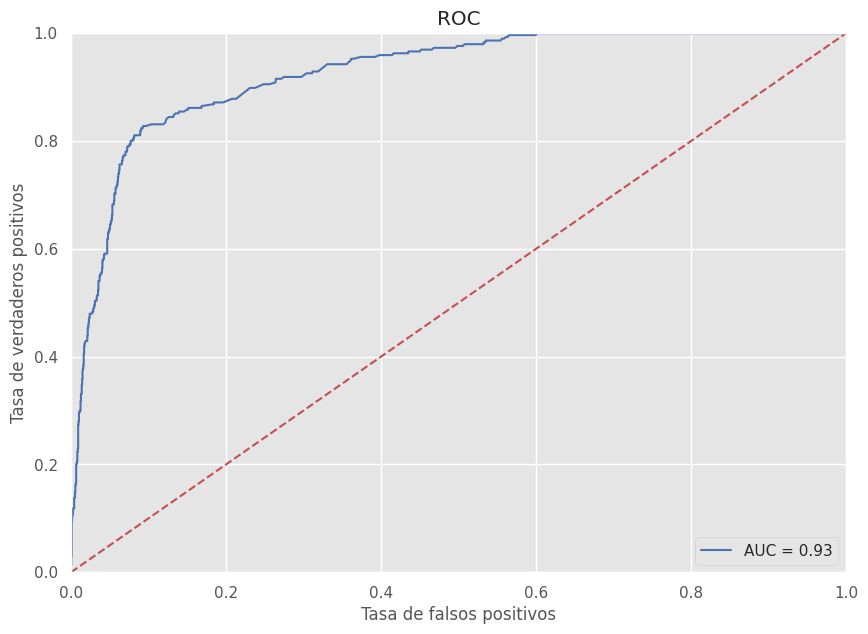

In [ ]:
# Obtener las predicciones de probabilidad para la clase positiva (1)
preds = svc_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(10,7))
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Tasa de verdaderos positivos')
plt.xlabel('Tasa de falsos positivos')
plt.show()

Gráfico de probalidad

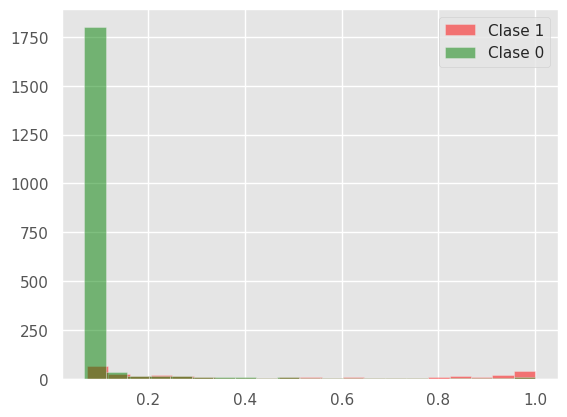

In [ ]:
doble_hist(y_test_pred_prob_pos[:, 1], y_test_pred_prob_neg[:, 1], n_bins=21, density=0)

Se representa en verde las probabilidades que asigna el modelo a los datos que son 0s (cuanto más cerca de 0 la distribución verde mejor) y en rojo las probabilidades asignadas a los datos que son 1s (cuanto más cerca esté de 1 la distribución roja mejor).

####Umbralización de predicciones

Las probabilidades que devuelve el modelo son valores continuos entre 0 y 1. Para pasarlo a 0s y a 1s es necesario usar un umbral de corte. Todo lo que sea mayor que el umbral será predicción = 1, y lo que sea menor será predicción = 0

Se utiiza un umbral de entre 0 a 1, pero en este caso se trabaja con un valor de 0.7 para ajustar de mejor manera los parametros de presició y sensibilidad del modelo

In [ ]:
umbral = 0.7
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

In [ ]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(y_test, y_umbralizadas),2)))
print("Sensitividad\t{}".format(round(metrics.recall_score(y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(y_test, y_umbralizadas),2)))

Matriz de confusión
 [[1923   25]
 [ 198   98]]

Accuracy	0.9
Sensitividad	0.33
Precisión	0.8


In [ ]:
acc_svc = round(metrics.accuracy_score(y_test, y_umbralizadas),2)
sen_svc = round(metrics.recall_score(y_test, y_umbralizadas),2)
pre_svc = round(metrics.precision_score(y_test, y_umbralizadas),2)

## Seleccion de Modelo

In [ ]:
# Datos
nombres = ['Regresion_logistica', 'MLP_Clasificacion', 'SVC']
acc = [acc_reg_log, acc_mlpc, acc_svc]
sen = [sen_reg_log, sen_mlpc, sen_svc]
pre = [pre_reg_log, pre_mlpc, pre_svc]

# Crear DataFrame
df = pd.DataFrame({
    'red': nombres,
    'accuracy': acc,
    'sensibilidad': sen,
    'precision': pre
})
df

,red,accuracy,sensibilidad,precision
0,Regresion_logistica,0.91,0.66,0.66
1,MLP_Clasificacion,0.91,0.65,0.67
2,SVC,0.90,0.33,0.80


Analizando los modelos presentados y optimizados, observamos que el **accuracy** de todos es similar rondeando el 0.9. Sin embargo notamos una diferencia en la precisión y sensibilidad. Los modelos de regresión logistica y MLPClassifier cuentan con sensibilidad y presisción basicamente iguales. En cambio, el modelo **SVC** cuenta con una mayor precisión y menor sensibilidad. Se podría argumentar que los 2 primeros modelos tienen un rendimiento balanceado ya que su sensibilidad y precisión ronda el 0.65. En contrapuesta, el modelo SVC es desbalanceado, pero, si nos referiminos a nuestra aplicación donde se desea conecer esclusivamente quienes pueden realizar una compra, este es ideal pues su precisión es de 0.8. Aunque, la sensibilidad del SVC es 0.33, esto refleja la realidad, pues existen mas cantidad de no compradores que compradores.

En conclusisión se opta por el modelo **SVC Support Vector Classifier**